## German Credit Data Analytics
## 20180727

## 1. Logistic Regression

## A. Data Preprocessing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
file = open("german.data-numeric.txt",'r')
line = file.readlines()
file.close()
# file 에 numeric 데이터 저장. 라인 단위로 line 에 저장.

dataset = []
for i in range(1000):
    a = list(" ".join(line[i].split()))
    memory = ""
    main = []
    for i in a:
        if i != " ":
            memory+=i
        else:
            main.append(int(memory))
            memory = " "
    if memory != " ":
        main.append(int(memory))
    dataset.append(main)
# dataset 리스트에 line 단위로 저장된 데이터를 전처리하여 저장

df = pd.DataFrame(dataset)

In [6]:
col_names1 = ['Check DM', 'Duration', 'Credit History', 'Purpose', 'Credit Amount',
            'Saving Account/Bond', 'Employment', 'Installment Rate', 'Personal Status',
            'Debtors', 'Residence', 'Property', 'Age', 'Other Installment', 'Housing',
            'Existing Credit', 'Job', 'Liable People', 'Telephone', 'Foreign', 'Credit']

col_names2 = ['Check DM', 'Duration', 'Credit History', 'Credit Amount',
            'Saving Account', 'Employment', 'Personal Status', 'Residence',
            'Property', 'Age', 'Other Installment', 'Existing Credit',
            'Liable People', 'Telephone', 'Foreign', '?', '??', 'No Debtor', 'Co Debtor',
            'Rent House','Own House', 'Job1', 'Job2', 'Job3', 'Credit']


# > 1. 4번 어트리뷰트 Purpose 데이터가 삭제된 것으로 보임.  
# > 2. 8번 어트리뷰트 Installment rate 가 삭제된 것으로 보임.
# > 3. 10번 어트리뷰트 debtors 여부가 뒷쪽에 붙음.
# > 4. 15번 어트리뷰트 Housing 상태가 뒷쪽에 붙음.
# > 5. 17번 어트리뷰트 Job 이 뒷쪽에 붙음.
# > 6. 마지막 어트리뷰트는 Good / Bad 임
# > 7. 마지막에서 두 번째에 존재하는 세 개의 값, 0 0 1 은 17번 어트리뷰트의 원 핫 인코딩 이었음
# > 8. 마지막에서 세 번째에 존재하는 두 개의 값, 0 1 은 15번 어트리뷰트의 원 핫 인코딩 이었음
# > 9. 마지막에서 네 번째에 존재하는 두 개의 값, 1 0 은 10번 어트리뷰트의 원 핫 인코딩 이었음
# > 10. 마지막에서 다섯번째에 존재하는 두 개의 값, 0 0 은 ???

In [7]:
df.columns = col_names2

In [193]:
df[df['Age'] < 20]

,Check_DM,Duration,Credit_History,Credit_Amount,Saving_Account,Employment,Personal_Status,Residence,Property,Age,...,?,??,No_Debtor,Co_Debtor,Rent_House,Own_House,Job1,Job2,Job3,Credit
391,2,12,2,10,4,2,2,4,1,19,...,0,0,1,0,1,0,0,1,0,1
633,4,9,2,20,1,2,2,2,3,19,...,0,0,0,1,1,0,0,0,1,2


In [8]:
df.head()

,Check DM,Duration,Credit History,Credit Amount,Saving Account,Employment,Personal Status,Residence,Property,Age,...,?,??,No Debtor,Co Debtor,Rent House,Own House,Job1,Job2,Job3,Credit
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [9]:
df.describe()

,Check DM,Duration,Credit History,Credit Amount,Saving Account,Employment,Personal Status,Residence,Property,Age,...,?,??,No Debtor,Co Debtor,Rent House,Own House,Job1,Job2,Job3,Credit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,32.711000,2.105000,3.384000,2.68200,2.845000,2.358000,35.546000,...,0.234000,0.103000,0.907000,0.041000,0.179000,0.713000,0.022000,0.2000,0.630000,1.300000
std,1.257638,12.058814,1.08312,28.252605,1.580023,1.208306,0.70808,1.103718,1.050209,11.375469,...,0.423584,0.304111,0.290578,0.198389,0.383544,0.452588,0.146757,0.4002,0.483046,0.458487
min,1.000000,4.000000,0.00000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
25%,1.000000,12.000000,2.00000,14.000000,1.000000,3.000000,2.00000,2.000000,1.000000,27.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
50%,2.000000,18.000000,2.00000,23.000000,1.000000,3.000000,3.00000,3.000000,2.000000,33.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,40.000000,3.000000,5.000000,3.00000,4.000000,3.000000,42.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,2.000000
max,4.000000,72.000000,4.00000,184.000000,5.000000,5.000000,4.00000,4.000000,4.000000,75.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,2.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
Check DM             1000 non-null int64
Duration             1000 non-null int64
Credit History       1000 non-null int64
Credit Amount        1000 non-null int64
Saving Account       1000 non-null int64
Employment           1000 non-null int64
Personal Status      1000 non-null int64
Residence            1000 non-null int64
Property             1000 non-null int64
Age                  1000 non-null int64
Other Installment    1000 non-null int64
Existing Credit      1000 non-null int64
Liable People        1000 non-null int64
Telephone            1000 non-null int64
Foreign              1000 non-null int64
?                    1000 non-null int64
??                   1000 non-null int64
No Debtor            1000 non-null int64
Co Debtor            1000 non-null int64
Rent House           1000 non-null int64
Own House            1000 non-null int64
Job1                 1000 non-nul

## B. Logistic Regression

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from subprocess import check_output

In [12]:
test_set = df.sample(n=100)

train_set = pd.concat([df, test_set, test_set]).drop_duplicates(keep=False)

In [13]:
X = train_set.loc[:,['Check DM', 'Duration', 'Credit History']]
Y = train_set.loc[:,'Credit']
Xtest = test_set.loc[:,['Check DM', 'Duration', 'Credit History']]

In [14]:
Xtrain,Xvalid,Ytrain,Yvalid = train_test_split(X,Y
                                               , test_size=0.33, random_state = 42)

In [15]:
LR = LogisticRegression(C=10)
LR.fit(X=Xtrain, y=Ytrain)
yPredTrain=LR.predict(Xtrain)
yPredValid = LR.predict(Xvalid)

In [16]:
def acc(Y,yPred):
    return np.sum(yPred==Y)/len(Y)

In [17]:
print('Train set accuracy', acc(Ytrain, yPredTrain), '%')
print('Validation set accuracy', acc(Yvalid, yPredValid), '%')

Train set accuracy 0.751243781095 %
Validation set accuracy 0.734006734007 %


In [18]:
yPredTest= LR.predict(Xtest)

In [19]:
ans = pd.DataFrame({'original': test_set['Credit'],'expected': yPredTest})

In [20]:
ans['result'] = np.where(ans['expected']==ans['original'] , 1, 0)
ans['result'].sum()

73

## 2. KNN

## A. Standardize

In [21]:
df.head()

,Check DM,Duration,Credit History,Credit Amount,Saving Account,Employment,Personal Status,Residence,Property,Age,...,?,??,No Debtor,Co Debtor,Rent House,Own House,Job1,Job2,Job3,Credit
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
drop_list = ['Credit', '?', '??', 'No Debtor', 'Co Debtor',
                    'Rent House', 'Own House', 'Job1', 'Job2', 'Job3']
scaler.fit(df.drop(drop_list, axis = 1))
scaled_features = scaler.transform(df.drop(drop_list, axis = 1))

In [23]:
new_colnames = col_names2 = ['Check DM', 'Duration', 'Credit History', 'Credit Amount',
            'Saving Account', 'Employment', 'Personal Status', 'Residence',
            'Property', 'Age', 'Other Installment', 'Existing Credit',
            'Liable People', 'Telephone', 'Foreign']
df_feat = pd.DataFrame(scaled_features, columns=new_colnames)
df_feat.head()

,Check DM,Duration,Credit History,Credit Amount,Saving Account,Employment,Personal Status,Residence,Property,Age,Other Installment,Existing Credit,Liable People,Telephone,Foreign
0,-1.254566,-1.236478,1.344014,-0.733432,1.833169,1.338078,0.449326,1.046987,-1.293723,2.766456,0.460831,1.027079,-0.428290,1.214598,-0.196014
1,-0.459026,2.248194,-0.503428,0.966377,-0.699707,-0.317959,-0.963650,-0.765977,-1.293723,-1.191404,0.460831,-0.704926,-0.428290,-0.823318,-0.196014
2,1.132053,-0.738668,1.344014,-0.414718,-0.699707,0.510060,0.449326,0.140505,-1.293723,1.183312,0.460831,-0.704926,2.334869,-0.823318,-0.196014
3,-1.254566,1.750384,-0.503428,1.639217,-0.699707,0.510060,0.449326,1.046987,-0.341055,0.831502,0.460831,-0.704926,2.334869,-0.823318,-0.196014
4,-1.254566,0.256953,0.420293,0.576837,-0.699707,-0.317959,0.449326,1.046987,1.564281,1.535122,0.460831,1.027079,2.334869,-0.823318,-0.196014


## B. Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Credit'],
                                                    test_size=0.30)

## C. Using KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

## D. Predictions and Evaluations

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[173  39]
 [ 58  30]]
             precision    recall  f1-score   support

          1       0.75      0.82      0.78       212
          2       0.43      0.34      0.38        88

avg / total       0.66      0.68      0.66       300



In [31]:
error_rate = []
for i in range(1,200):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

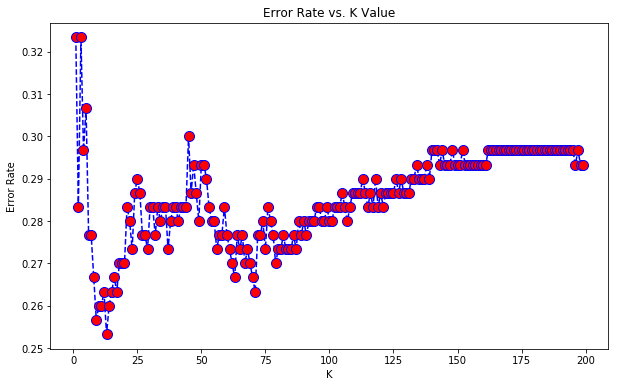

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,200),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
error_rate.index(min(error_rate)) + 1

13

In [34]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=105)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=105')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=105


[[208   4]
 [ 82   6]]


             precision    recall  f1-score   support

          1       0.72      0.98      0.83       212
          2       0.60      0.07      0.12        88

avg / total       0.68      0.71      0.62       300



## 3. Decision Tree

## A. Decision Tree Test

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
Check DM             1000 non-null int64
Duration             1000 non-null int64
Credit History       1000 non-null int64
Credit Amount        1000 non-null int64
Saving Account       1000 non-null int64
Employment           1000 non-null int64
Personal Status      1000 non-null int64
Residence            1000 non-null int64
Property             1000 non-null int64
Age                  1000 non-null int64
Other Installment    1000 non-null int64
Existing Credit      1000 non-null int64
Liable People        1000 non-null int64
Telephone            1000 non-null int64
Foreign              1000 non-null int64
?                    1000 non-null int64
??                   1000 non-null int64
No Debtor            1000 non-null int64
Co Debtor            1000 non-null int64
Rent House           1000 non-null int64
Own House            1000 non-null int64
Job1                 1000 non-nul

In [37]:
drop_list = ['Credit', '?', '??', 'No Debtor', 'Co Debtor',
                    'Rent House', 'Own House', 'Job1', 'Job2', 'Job3']
X = df.drop(drop_list, axis = 1)
Y = df['Credit']
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, stratify=Y, random_state=101)

In [38]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.775
테스트 세트 정확도: 0.740


## B. Feature Importances

In [39]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[ 0.40860801  0.14281721  0.1516247   0.04455589  0.05757513  0.04787392
  0.          0.          0.          0.10610459  0.04084055  0.          0.
  0.          0.        ]


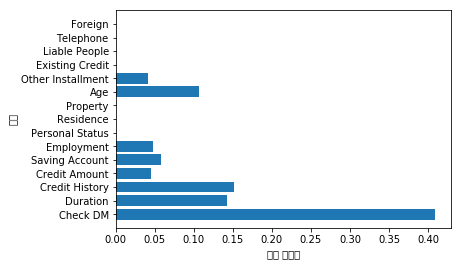

In [40]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

## C. Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 0.965
테스트 세트 정확도: 0.748


In [43]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.764


In [44]:
forest = RandomForestClassifier(n_estimators=500)
forest.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.756


## 3. Decision Tree2

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
Check DM             1000 non-null int64
Duration             1000 non-null int64
Credit History       1000 non-null int64
Credit Amount        1000 non-null int64
Saving Account       1000 non-null int64
Employment           1000 non-null int64
Personal Status      1000 non-null int64
Residence            1000 non-null int64
Property             1000 non-null int64
Age                  1000 non-null int64
Other Installment    1000 non-null int64
Existing Credit      1000 non-null int64
Liable People        1000 non-null int64
Telephone            1000 non-null int64
Foreign              1000 non-null int64
?                    1000 non-null int64
??                   1000 non-null int64
No Debtor            1000 non-null int64
Co Debtor            1000 non-null int64
Rent House           1000 non-null int64
Own House            1000 non-null int64
Job1                 1000 non-nul

Text(0.5,0,'Duration')

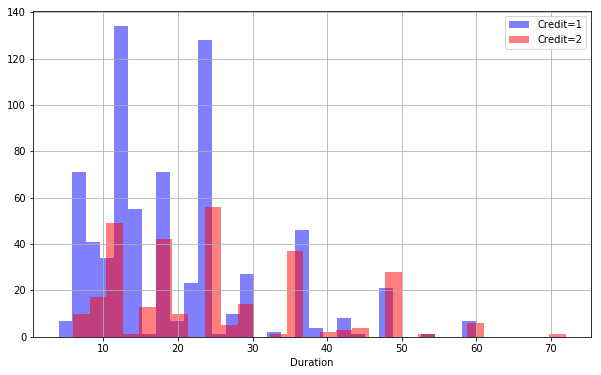

In [46]:
plt.figure(figsize=(10,6))
df[df['Credit']==1]['Duration'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit=1')
df[df['Credit']==2]['Duration'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit=2')
plt.legend()
plt.xlabel('Duration')

In [47]:
X = df.drop('Credit', axis = 1)
y = df['Credit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [49]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [50]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          1       0.76      0.79      0.78       204
          2       0.52      0.48      0.50        96

avg / total       0.69      0.69      0.69       300



In [51]:
print(confusion_matrix(y_test, predictions))

[[162  42]
 [ 50  46]]


In [52]:
rfc = RandomForestClassifier(n_estimators = 300)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## K Mean Clusturing

In [56]:
from sklearn.cluster import KMeans

In [57]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df.drop('Credit', axis = 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
kmeans.cluster_centers_

array([[  2.60955056e+00,   1.60084270e+01,   2.57022472e+00,
          1.85730337e+01,   2.05337079e+00,   3.38764045e+00,
          2.68117978e+00,   2.81460674e+00,   2.17556180e+00,
          3.51839888e+01,   2.68539326e+00,   1.38764045e+00,
          1.14887640e+00,   1.32865169e+00,   1.04775281e+00,
          2.54213483e-01,   5.61797753e-02,   9.04494382e-01,
          3.51123596e-02,   1.91011236e-01,   7.34550562e-01,
          2.24719101e-02,   2.37359551e-01,   6.48876404e-01],
       [  2.48908297e+00,   3.12183406e+01,   2.54148472e+00,
          5.53624454e+01,   2.17903930e+00,   3.37991266e+00,
          2.69868996e+00,   2.95633188e+00,   2.69868996e+00,
          3.65807860e+01,   2.66375546e+00,   1.47598253e+00,
          1.17467249e+00,   1.53711790e+00,   1.00436681e+00,
          1.61572052e-01,   2.05240175e-01,   9.17030568e-01,
          4.36681223e-02,   1.57205240e-01,   6.81222707e-01,
          2.18340611e-02,   1.09170306e-01,   6.28820961e-01],
      

In [59]:
print(confusion_matrix(df['Credit'],kmeans.labels_))
print(classification_report(df['Credit'],kmeans.labels_))

[[  0   0   0]
 [529 143  28]
 [183  86  31]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.62      0.20      0.31       700
          2       0.53      0.10      0.17       300

avg / total       0.59      0.17      0.27      1000



/Users/sungjae/y36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## K Mean Clusturing

In [60]:
df_test = df[['Check DM', 'Duration', 'Employment', 'Age', 'Personal Status', 'Credit']]

In [61]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
Check DM           1000 non-null int64
Duration           1000 non-null int64
Employment         1000 non-null int64
Age                1000 non-null int64
Personal Status    1000 non-null int64
Credit             1000 non-null int64
dtypes: int64(6)
memory usage: 47.0 KB


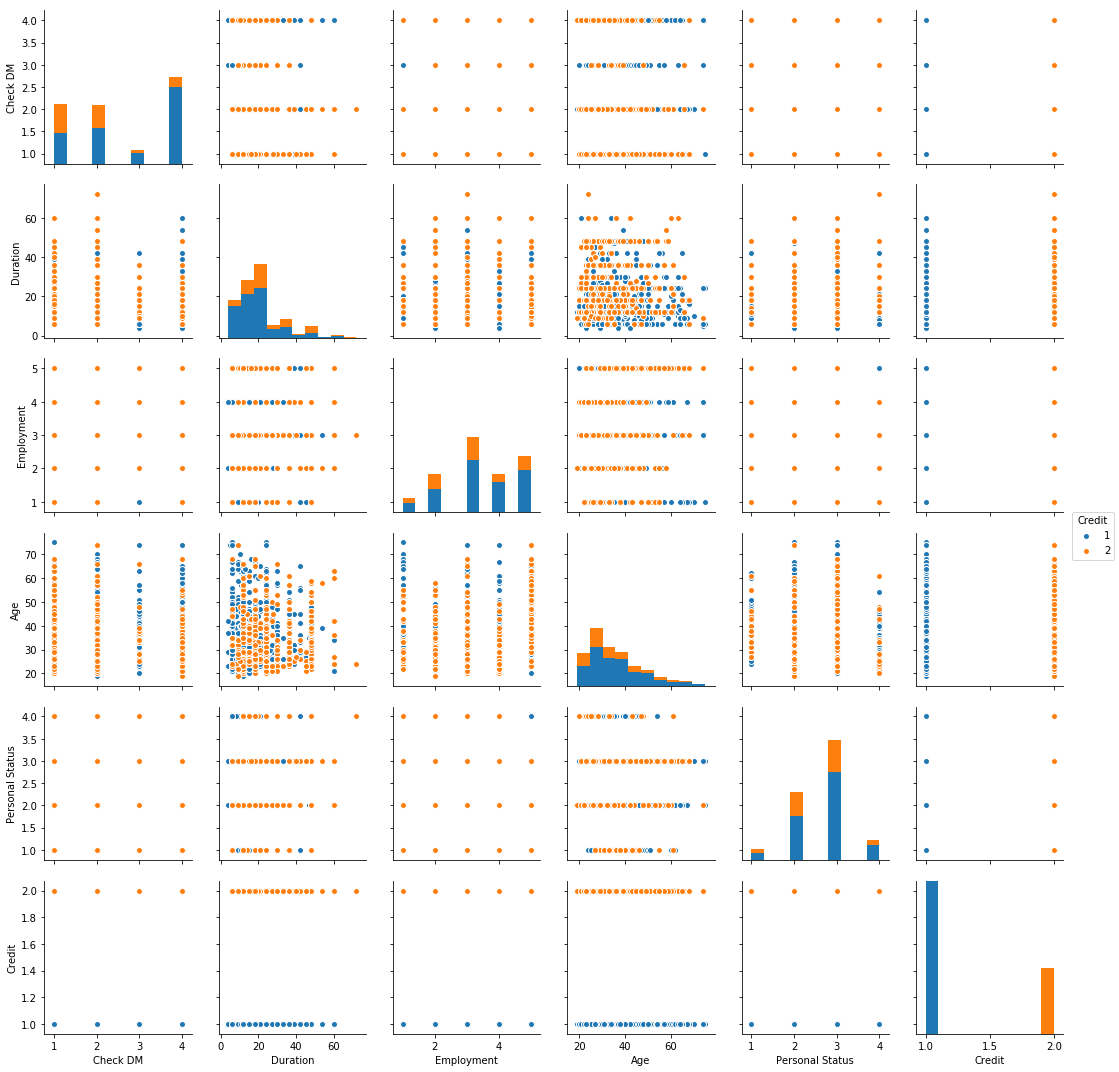

In [62]:
sns.pairplot(df_test, hue = 'Credit');

In [63]:
X = df.drop('Credit', axis = 1)
y = df['Credit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [64]:
from sklearn.svm import SVC

In [65]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
predictions = svc_model.predict(X_test)

In [67]:
print(confusion_matrix(y_test, predictions))

[[207   1]
 [ 90   2]]


In [68]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          1       0.70      1.00      0.82       208
          2       0.67      0.02      0.04        92

avg / total       0.69      0.70      0.58       300



## Gridsearch Practice in SVM

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001]}

In [71]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [73]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[181  27]
 [ 49  43]]


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
Check DM             1000 non-null int64
Duration             1000 non-null int64
Credit History       1000 non-null int64
Credit Amount        1000 non-null int64
Saving Account       1000 non-null int64
Employment           1000 non-null int64
Personal Status      1000 non-null int64
Residence            1000 non-null int64
Property             1000 non-null int64
Age                  1000 non-null int64
Other Installment    1000 non-null int64
Existing Credit      1000 non-null int64
Liable People        1000 non-null int64
Telephone            1000 non-null int64
Foreign              1000 non-null int64
?                    1000 non-null int64
??                   1000 non-null int64
No Debtor            1000 non-null int64
Co Debtor            1000 non-null int64
Rent House           1000 non-null int64
Own House            1000 non-null int64
Job1                 1000 non-nul

In [76]:
df['Age'][df['Credit'] == 2].describe()

count    300.000000
mean      33.963333
std       11.222379
min       19.000000
25%       25.000000
50%       31.000000
75%       40.000000
max       74.000000
Name: Age, dtype: float64

In [77]:
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [78]:
col_names2 = ['Check_DM', 'Duration', 'Credit_History', 'Credit_Amount',
            'Saving_Account', 'Employment', 'Personal_Status', 'Residence',
            'Property', 'Age', 'Other_Installment', 'Existing_Credit',
            'Liable_People', 'Telephone', 'Foreign', '?', '??', 'No_Debtor', 'Co_Debtor',
            'Rent_House','Own_House', 'Job1', 'Job2', 'Job3', 'Credit']

df_test2 = df
df_test2.columns = col_names2

In [79]:
result = sm.ols(formula = 'Credit ~ Credit_Amount', data = df_test2).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Credit   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     24.27
Date:                Sat, 28 Jul 2018   Prob (F-statistic):           9.82e-07
Time:                        14:56:22   Log-Likelihood:                -626.60
No. Observations:                1000   AIC:                             1257.
Df Residuals:                     998   BIC:                             1267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2182      0.022     55.541      0.000       1.175       1.261
Credit_Amount     0.0025      0.001      4.926      0.000       0.002       0.003
==============================================================================
Omnibus:                      582.034   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.566
Skew:                           0.863   Prob(JB):                     1.68e-39
Kurtosis:                       1.857   Cond. No.                         66.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2]:
P = ['Check_DM', 'Duration', 'Credit_History', 'Credit_Amount',
            'Saving_Account', 'Employment', 'Personal_Status', 'Residence',
            'Property', 'Age', 'Other_Installment', 'Existing_Credit',
            'Liable_People', 'Telephone', 'Foreign', '?', '??', 'No_Debtor', 'Co_Debtor',
            'Rent_House','Own_House', 'Job1', 'Job2', 'Job3']
y = ['y']
X = [i for i in P if i not in y]

In [130]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

rfe = RFE(logreg, 10)
rfe = rfe.fit(df[X],df['Credit'])
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False False False False False  True False  True False
 False False  True  True  True  True  True  True False False False False]
[ 1 10  1 15  2  6  5 13  1 14  1  4  7  8  1  1  1  1  1  1  9  3 12 11]


In [154]:
rfe_list = list(rfe.support_)
indices = [i for i, x in enumerate(rfe_list) if x]
indices
result_list = []
for i in indices:
    result_list.append(P[i])
result_list

['Check_DM',
 'Credit_History',
 'Property',
 'Other_Installment',
 'Foreign',
 '?',
 '??',
 'No_Debtor',
 'Co_Debtor',
 'Rent_House']

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
Check_DM             1000 non-null int64
Duration             1000 non-null int64
Credit_History       1000 non-null int64
Credit_Amount        1000 non-null int64
Saving_Account       1000 non-null int64
Employment           1000 non-null int64
Personal_Status      1000 non-null int64
Residence            1000 non-null int64
Property             1000 non-null int64
Age                  1000 non-null int64
Other_Installment    1000 non-null int64
Existing_Credit      1000 non-null int64
Liable_People        1000 non-null int64
Telephone            1000 non-null int64
Foreign              1000 non-null int64
?                    1000 non-null int64
??                   1000 non-null int64
No_Debtor            1000 non-null int64
Co_Debtor            1000 non-null int64
Rent_House           1000 non-null int64
Own_House            1000 non-null int64
Job1                 1000 non-nul

In [169]:
X = df[['Check_DM', 'Credit_History', 'Property', 'Other_Installment', 'Foreign', '?', '??', 'No_Debtor',
       'Co_Debtor', 'Rent_House']]
y = df['Credit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [170]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2)
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_test)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.8s finished


In [171]:
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[201  16]
 [ 53  30]]
             precision    recall  f1-score   support

          1       0.79      0.93      0.85       217
          2       0.65      0.36      0.47        83

avg / total       0.75      0.77      0.75       300



In [172]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [174]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[183  34]
 [ 54  29]]
             precision    recall  f1-score   support

          1       0.77      0.84      0.81       217
          2       0.46      0.35      0.40        83

avg / total       0.69      0.71      0.69       300



In [186]:
rfc = RandomForestClassifier(n_estimators = 300)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          1       0.77      0.85      0.81       217
          2       0.46      0.34      0.39        83

avg / total       0.68      0.71      0.69       300

[[184  33]
 [ 55  28]]


In [176]:
53 * (-5) + 32 * (-1)

-297